## Initializing

In [1]:
import pandas as pd
import scipy 
import matplotlib
from matplotlib import pyplot as plt
import numpy as np 
import seaborn as sns 
%matplotlib inline

In [2]:
data= pd.read_csv("shooting-1982-2023.csv", sep=',')
data.head()

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,...,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,race,gender,latitude,longitude,type,year
0,Nashville religious school shooting,"Nashville, TN",3-27-23,"Audrey Hale, 28, who was a former student at t...",6,1,6,School,28,-,...,-,-,"semiautomatic rifle, semiautomatic handgun",-,-,"F (identified as transgender, per police)",-,-,Mass,2023
1,Michigan State University shooting,"East Lansing, Michigan",2-13-23,"Anthony D. McRae, 43, opened fire at Berkey Ha...",3,5,8,School,43,-,...,yes,-,semiautomatic handguns,-,Black,M,-,-,Mass,2023
2,Half Moon Bay spree shooting,"Half Moon Bay, California",1-23-23,"Chunli Zhao, 67, suspected of carrying out the...",7,1,8,workplace,67,-,...,-,-,semiautomatic handgun,-,Asian,M,-,-,Spree,2023
3,LA dance studio mass shooting,"Monterey Park, California",1-21-23,"Huu Can Tran, 72, fled the scene in a white va...",11,10,21,Other,72,yes,...,-,-,semiautomatic assault weapon (Details pending),-,Asian,M,-,-,Mass,2023
4,Virginia Walmart shooting,"Chesapeake, Virginia",11-22-22,"Andre Bing, 31, who worked as a supervisor at ...",6,6,12,Workplace,31,-,...,-,-,semiautomatic handgun,-,Black,M,-,-,Mass,2022


## Data types and columns

In [3]:
data.columns
#Columns are 'case', 'location', 'date', 'summary', 'fatalities', 'injured', 'total_victims', 'location.1', 
#'age_of_shooter', 'prior_signs_mental_health_issues', 'mental_health_details',
#'weapons_obtained_legally', 'where_obtained', 'weapon_type',
# 'weapon_details', 'race', 'gender', 'latitude', 'longitude', 'type',
# 'year']

Index(['case', 'location', 'date', 'summary', 'fatalities', 'injured',
       'total_victims', 'location.1', 'age_of_shooter',
       'prior_signs_mental_health_issues', 'mental_health_details',
       'weapons_obtained_legally', 'where_obtained', 'weapon_type',
       'weapon_details', 'race', 'gender', 'latitude', 'longitude', 'type',
       'year'],
      dtype='object')

In [4]:
data.describe()
# 141 rows 
# 2 quantitative columns : 
# fatalities (mean 7.8, min 3, max 58) - should be integer 
# year 1982 to 2023 - should be integer 

,fatalities,year
count,141.000000,141.000000
mean,7.808511,2010.382979
std,7.463162,10.796600
min,3.000000,1982.000000
25%,4.000000,2005.000000
50%,6.000000,2014.000000
75%,8.000000,2018.000000
max,58.000000,2023.000000


In [5]:
data.describe(include="O")
#qualitative data 
# Case : all unique 0K 
#location : 130 unique (top = Colorado Springs - 3)
# date : 141 unique 
# summary : 141 unique 
# injured : 32 unique - should be integer 
# total victims = 42 unique - should be integer 
#location 1 : 10 unique 
# age of shooter : 47 unique - should be integer 
# signs MH - 8 unique 
# details : 95 unique 
# weapons obtained legally - 10 unique
# where obtained - 10 unique 
# weapon type - 74 unique
# weapon details - 111 unique
# race - 11 unique 
#gender - 6 unique 
# type - 2 unique 


,case,location,date,summary,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,mental_health_details,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,race,gender,latitude,longitude,type
count,141,141,141,141,141,141,141,141,141,141,141,141,141,140,141,141,141,141,141
unique,141,130,141,141,32,42,10,47,8,95,10,76,74,111,11,6,127,127,2
top,Nashville religious school shooting,"Colorado Springs, Colorado",3-27-23,"Audrey Hale, 28, who was a former student at t...",0,5,Other,21,Yes,-,Yes,-,One semiautomatic handgun,-,white,Male,-,-,Mass
freq,1,3,1,1,25,16,50,8,58,42,81,46,18,25,41,70,15,15,120


In [6]:
data.info()
# null not recognized because all are considered objects 
## transforming columns into integers is not necessary as Tableau recognizes it automatically

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   case                              141 non-null    object
 1   location                          141 non-null    object
 2   date                              141 non-null    object
 3   summary                           141 non-null    object
 4   fatalities                        141 non-null    int64 
 5   injured                           141 non-null    object
 6   total_victims                     141 non-null    object
 7   location.1                        141 non-null    object
 8   age_of_shooter                    141 non-null    object
 9   prior_signs_mental_health_issues  141 non-null    object
 10  mental_health_details             141 non-null    object
 11  weapons_obtained_legally          141 non-null    object
 12  where_obtained        

## Shooter profile

### Gender

In [7]:
data['gender'].value_counts()
# change Male to M, Female to F 

Male                                         70
M                                            65
Male & Female                                 2
Female                                        2
F (identified as transgender, per police)     1
F                                             1
Name: gender, dtype: int64

In [8]:
# We noticed there are 6 unique values in gender. 
data['gender']=data["gender"].map({'Male':'M', 'Female':'F', 'M': 'M', 'Male & Female': 'Male & Female', 'F (identified as transgender, per police)':'F (identified as transgender, per police)', 'F':'F'})
data['gender'].value_counts()

M                                            135
F                                              3
Male & Female                                  2
F (identified as transgender, per police)      1
Name: gender, dtype: int64

### Age

In [9]:
data['age_of_shooter'].value_counts()
data['age_of_shooter'].unique()
# 2 rows have '-' as a value

array(['28', '43', '67', '72', '31', '22', '15', '20', '21', '70', '23',
       '45', '18', '-', '57', '19', '44', '51', '36', '24', '40', '32',
       '46', '26', '54', '29', '38', '17', '47', '37', '64', '39', '25',
       '33', '27', '34', '42', '59', '41', '52', '16', '48', '66', '11',
       '35', '55', '50'], dtype=object)

In [10]:
data.loc[data['age_of_shooter']=='-']

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,...,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,race,gender,latitude,longitude,type,year
15,Sacramento County church shooting,"Sacramento, California",2-28-22,"""A man believed to be meeting his three childr...",4,0,4,Religious,-,-,...,-,-,semiautomatic rifle,"AR-15-style ""ghost gun""",-,M,38.60111019,-121.4189659,Mass,2022
24,Jersey City kosher market shooting,"Jersey City, New Jersey",12-10-19,"David N. Anderson, 47, and Francine Graham, 50...",4,3,7,Other,-,-,...,-,-,semiautomatic rifle; shotgun; semiautomatic ha...,AR-15-style rifle; Mossberg 12-gauge shotgun; ...,Black,Male & Female,40.707363,-74.083609,Spree,2019


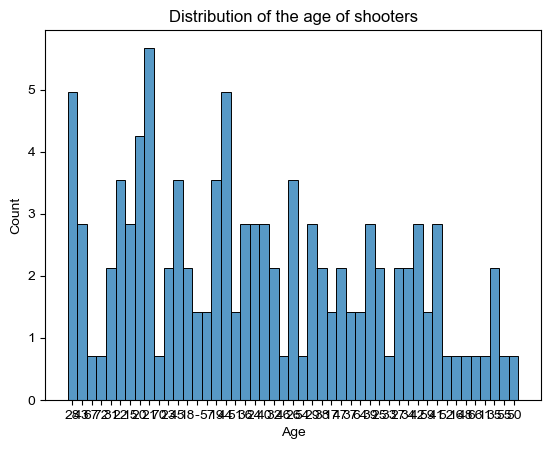

In [11]:
sns.histplot(data=data, x='age_of_shooter', stat='percent', bins=10)
sns.set_style('darkgrid')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of the age of shooters')
plt.show()

In [12]:
# possible improvement : create bins ourselves 
# other bonus : find information regarding missing values
#df.loc[df["Age"] <= list_quart[0] , "Age_Category"] = "Under 30"

### Race

In [13]:
data['race'].value_counts()
#data['race'].unique()

white              41
White              31
Black              16
-                  13
Latino             11
Asian              10
black               9
Other               5
Native American     3
White               1
unclear             1
Name: race, dtype: int64

In [14]:
data.loc[(data["race"]== 'white'), "race"] = "White"
data.loc[(data["race"]== 'black'), "race"] = "Black"
data.loc[(data["race"]== 'unclear'), "race"] = "Unknown"
data['race'].unique()

array(['-', 'Black', 'Asian', 'White', 'Latino', 'Other', 'White ',
       'Native American', 'Unknown'], dtype=object)

In [15]:
data.loc[(data["race"]== '-'), "race"] = "Unknown"
data.loc[(data["race"]== 'White '), "race"] = "White"
data['race'].value_counts()

White              73
Black              25
Unknown            14
Latino             11
Asian              10
Other               5
Native American     3
Name: race, dtype: int64

### Mental health

In [16]:
data['prior_signs_mental_health_issues'].value_counts(normalize=True)
#data['prior_signs_mental_health_issues'].unique()


Yes         0.411348
-           0.198582
Unclear     0.163121
No          0.120567
yes         0.056738
TBD         0.035461
Unknown     0.007092
Unclear     0.007092
Name: prior_signs_mental_health_issues, dtype: float64

In [17]:
data.loc[(data["prior_signs_mental_health_issues"]== 'yes'), "prior_signs_mental_health_issues"] = "Yes"
data.loc[(data["prior_signs_mental_health_issues"]== '-'), "prior_signs_mental_health_issues"] = "Unknown"
data.loc[(data["prior_signs_mental_health_issues"]== 'TBD'), "prior_signs_mental_health_issues"] = "Unclear"
data.loc[(data["prior_signs_mental_health_issues"]== 'Unclear '), "prior_signs_mental_health_issues"] = "Unclear"
data['prior_signs_mental_health_issues'].value_counts(normalize=True)

Yes        0.468085
Unknown    0.205674
Unclear    0.205674
No         0.120567
Name: prior_signs_mental_health_issues, dtype: float64

## Shooting information

### Geographical location (city, state)

In [18]:
data['location'].unique()

array(['Nashville, TN', 'East Lansing, Michigan',
       'Half Moon Bay, California', 'Monterey Park, California',
       'Chesapeake, Virginia', 'Colorado Springs, Colorado',
       'Charlottesville, Virginia', 'Hedingham, North Carolina',
       'Greenwood, Indiana', 'Highland Park, Illinois',
       'Birmingham, Alabama', 'Smithsburg, Maryland', 'Tulsa, Oklahoma',
       'Uvalde, Texas', 'Buffalo, New York', 'Sacramento, California',
       'Oxford, Michigan', 'San Jose, California',
       'Indianapolis, Indiana', 'Orange, California', 'Boulder, Colorado',
       'Atlanta, Georgia', 'Springfield, Missouri',
       'Milwaukee, Wisconsin', 'Jersey City, New Jersey',
       'Pensacola, Florida', 'Odessa, Texas', 'Dayton, Ohio',
       'El Paso, Texas', 'Gilroy, California', 'Virginia Beach, Virginia',
       'Aurora, Illinois', 'State College, Pennsylvania',
       'Sebring, Florida', 'Chicago, Illinois',
       'Thousand Oaks, California', 'Pittsburgh, Pennsylvania',
       'Perryman

In [19]:
data[['city', 'state']] = data['location'].str.split(',', 1, expand=True)

/var/folders/5g/jskfzb8j377fh7wl3_rxvkrc0000gn/T/ipykernel_4336/2118820420.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  data[['city', 'state']] = data['location'].str.split(',', 1, expand=True)


In [35]:
data['city'] = data['city'].str.strip()
data['state']= data['state'].str.strip()
data.loc[(data["state"]== 'TN'), "state"] = "Tennessee"
data['state'].unique()

array(['Tennessee', 'Michigan', 'California', 'Virginia', 'Colorado',
       'North Carolina', 'Indiana', 'Illinois', 'Alabama', 'Maryland',
       'Oklahoma', 'Texas', 'New York', 'Georgia', 'Missouri',
       'Wisconsin', 'New Jersey', 'Florida', 'Ohio', 'Pennsylvania',
       'Nevada', 'Washington', 'Lousiana', 'Kansas', 'Oregon',
       'South Carolina', 'D.C.', 'Connecticut', 'Minnesota', 'Arizona',
       'Kentucky', 'Nebraska', 'Utah', 'Mississippi', 'Massachusetts',
       'Hawaii', 'Arkansas', 'Iowa'], dtype=object)

### Type (mass or not)

In [21]:
data['type'].value_counts()

Mass     120
Spree     21
Name: type, dtype: int64

### Location

In [22]:
data["location.1"].unique()

array(['School', 'workplace', 'Other', 'Workplace', 'religious',
       'Religious', 'Military', 'Airport', '\nWorkplace', 'Other\n'],
      dtype=object)

In [23]:
#location.1 column cleaning (workplace to Workplace) -
data.loc[(data["location.1"]== 'workplace'), "location.1"] = "Workplace"
#location.1 column cleaning (religious to Religious)
data.loc[(data["location.1"]== 'religious'), "location.1"] = "Religious"
#location.1 column cleaning (Other/n to Other)
data.loc[(data["location.1"]== 'Other\n'), "location.1"] = "Other"
#location.1 column cleaning (\nWorkplace to Workplace)
data.loc[(data["location.1"]== '\nWorkplace'), "location.1"] = "Workplace"
data["location.1"].value_counts()

Other        53
Workplace    51
School       22
Religious     8
Military      6
Airport       1
Name: location.1, dtype: int64

### Fatalities

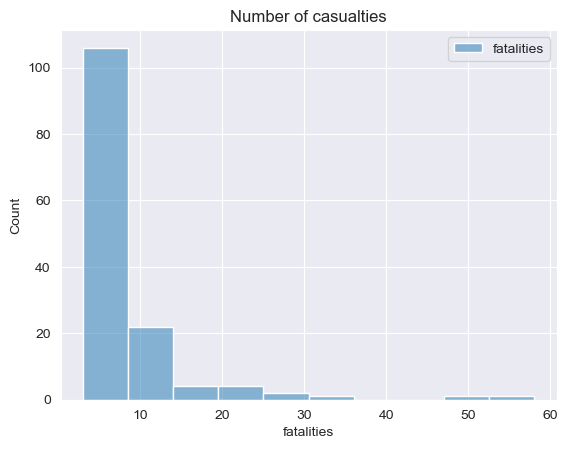

In [24]:
data_fat=pd.DataFrame(data['fatalities'])
data_fat
sns.histplot(data=data_fat, bins=10)
sns.set_style('darkgrid')
plt.xlabel('fatalities')
plt.ylabel('Count')
plt.title('Number of casualties')
plt.show()


### Injured

In [25]:
#Injured column cleaning (remove '(TK - "fewer than 10"')
mask = '(TK - "fewer than 10"'
data.loc[(data["injured"]== mask), "injured"] = '10'

In [26]:
#Injured column cleaning result
data["injured"].unique()

array(['1', '5', '10', '6', '25', '2', '46', '0', '17', '3', '7', '8',
       '27', '26', '12', '4', '22', '13', '20', '546', '11', '53', '14',
       '21', '9', '70', '31', '23', '24', '19', '29'], dtype=object)

### Total victims

In [27]:
#Total_victims column cleaning
data["total_victims"].unique()

array(['6', '8', '21', '12', '30', '5', '7', '53', '3', '4', 'TK', '38',
       '13', '11', '9', '15', '10', '32', '36', '48', '16', '34', '17',
       '23', '46', '604', '102', '35', '18', '19', '20', '29', '82', '44',
       '26', '55', '22', '37', '28', '25', '14', '41'], dtype=object)

In [28]:
#need to modify TK by an integer
data.loc[data["total_victims"] =='TK']

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,...,weapon_type,weapon_details,race,gender,latitude,longitude,type,year,city,state
12,Tulsa medical center shooting,"Tulsa, Oklahoma",6-1-22,"Michael Louis, 45, killed four, including two ...",4,10,TK,Workplace,45,Unknown,...,semiautomatic rifle; semiautomatic handgun,AR-15 style rifle,Black,M,-,-,Mass,2022,Tulsa,Oklahoma


In [29]:
data.loc[(data["total_victims"]== 'TK'), "total_victims"] = '14'
#Modification result
data["total_victims"].unique()

array(['6', '8', '21', '12', '30', '5', '7', '53', '3', '4', '14', '38',
       '13', '11', '9', '15', '10', '32', '36', '48', '16', '34', '17',
       '23', '46', '604', '102', '35', '18', '19', '20', '29', '82', '44',
       '26', '55', '22', '37', '28', '25', '41'], dtype=object)

### Weapons obtained legally

In [30]:
#weapons_obtained_legally column cleaning (- to Unknown)
data.loc[(data["weapons_obtained_legally"]== '-'), "weapons_obtained_legally"] = "Unknown"

#weapons_obtained_legally column cleaning (yes to Yes)
data.loc[(data["weapons_obtained_legally"]== 'yes'), "weapons_obtained_legally"] = "Yes"

#weapons_obtained_legally column cleaning (TBD to Unknown)
data.loc[(data["weapons_obtained_legally"]== 'TBD'), "weapons_obtained_legally"] = "Unknown"

#weapons_obtained_legally column cleaning (\nYes to Yes)
data.loc[(data["weapons_obtained_legally"]== '\nYes'), "weapons_obtained_legally"] = "Yes"

#weapons_obtained_legally column cleaning (Kelley passed... to Yes)
data.loc[(data["weapons_obtained_legally"]== 'Kelley passed federal criminal background checks; the US Air Force failed to provide information on his criminal history to the FBI'), "weapons_obtained_legally"] = "Yes"

#weapons_obtained_legally column cleaning (Yes... to Yes)
data.loc[(data["weapons_obtained_legally"]== 'Yes ("some of the weapons were purchased legally and some of them may not have been")'), "weapons_obtained_legally"] = "Yes"

#weapons_obtained_legally column cleaning ('Yes ' to Yes)
data.loc[(data["weapons_obtained_legally"]== 'Yes '), "weapons_obtained_legally"] = "Yes"

## Rename columns

In [31]:
data.columns

Index(['case', 'location', 'date', 'summary', 'fatalities', 'injured',
       'total_victims', 'location.1', 'age_of_shooter',
       'prior_signs_mental_health_issues', 'mental_health_details',
       'weapons_obtained_legally', 'where_obtained', 'weapon_type',
       'weapon_details', 'race', 'gender', 'latitude', 'longitude', 'type',
       'year', 'city', 'state'],
      dtype='object')

In [32]:
data.columns = ['case', 'geo_location', 'date', 'summary', 'fatalities', 'injured',
       'total_victims', 'location', 'age_of_shooter',
       'prior_signs_mental_health_issues', 'mental_health_details',
       'weapons_obtained_legally', 'where_obtained', 'weapon_type',
       'weapon_details', 'race', 'gender', 'latitude', 'longitude', 'type',
       'year', 'city', 'state']

In [33]:
data.drop(columns='geo_location', inplace=True)

In [36]:
data.to_csv("gun_violence_cleaned_IH.csv", sep=(';'))